# An Introduction to Statistical Learning

## References

* [An Introduction to Statistical Learning with Applications in R](http://www-bcf.usc.edu/~gareth/ISL/) by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani

## Statistical Learning

Tools for **understanding data**, i.e., for **predicting**, or **estimating**, an output based on inputs.

* **Supervised methods** : inputs and some outputs
* **Unsupervised methods** : inputs

## Imports

In [22]:
import pandas as pd

import matplotlib.pyplot as plt

import statsmodels.api as sm

import numpy as np

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

## Examples of data sets

#### Stock Market

We consider the *Standard & Poor's 500* (S&P) stock index over a 5 year period :

In [17]:
# import Smarket data in python ..
smarket = pd.read_csv('../datasets/Smarket.csv', index_col=0, parse_dates=True)
smarket.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


Where *Lag1* through *Lag5* stand for the percentage returns for the five previous days.

**Prediction** : Will the index increase or decrease based on the past 5 days' percentage changes in the index ?

#### Advertising

In [21]:
# import Smarket data in python ...
advertising = pd.read_csv('../datasets/Advertising.csv', index_col=0)
print(type(advertising))
advertising.head()

<class 'pandas.core.frame.DataFrame'>


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


For a particular **product**, this dataset provides for 200 markets :
* Advertising budgets for TV, radio, and newspaper (in thousands of dollars)
* The sales (in thousands of units)

We wish to understand association between advertising and sales to control advertising expenditure in each of the three media. 

**Input variables** ($X$) :
* $X_1$ : TV budget
* $X_2$ : Radio budget
* $X_3$ : newspaper budget

**Output variable** :
* $Y$ : Sales

Relationship between Y and X :

$$
Y = f(X) + \epsilon
$$

where $f$ is an unkdown function and $\epsilon$ a random error term independent of X and which has mean zero (otherwise easy to compensate by modifying $f$). This error cannot be reduced to zero. For example, it may depend on unmeasured variables that are useful for predicting the value of $Y$.

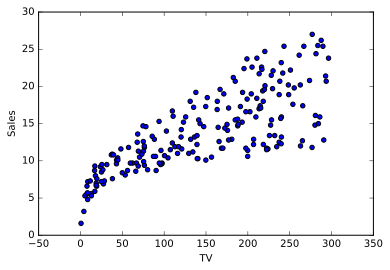

In [4]:
advertising.plot(kind='scatter', color='Blue', x='TV', y='Sales')

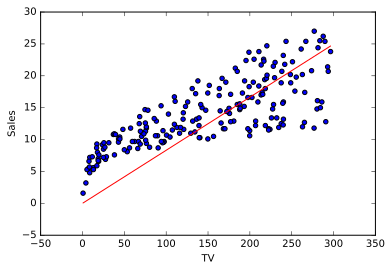

In [5]:
# Ordinary Least Squares
model = sm.OLS(advertising['Sales'], advertising['TV']).fit()

advertising.plot(kind='scatter', color='Blue', x='TV', y='Sales')

plt.plot(advertising['TV'], model.fittedvalues, 'r')

## Prediction

$$
\hat{Y} = \hat{f}(X)
$$

* $\hat{f}$ : an estimate for $f$ (a black box)
* $\hat{Y}$ : the prediction for $Y$

*Reductible* and *irreductible* errors given a set of variables $X$, estimate $\hat{f}$, and prediction $\hat{Y}$:

$$
\begin{align*}
E(Y - \hat{Y})^2 &= E[f(X) + \epsilon - \hat{f}(X)]^2\\
&= [f(X) - \hat{f}(X)]^2 + Var(\epsilon).
\end{align*}
$$

The value of $[f(X) - \hat{f}(X)]^2$ can be, potentially, reduced by using a more apropriate statistical learning method for estimating $f$. The value of $ Var(\epsilon)$ cannot be reduced and is unknown in practice.

## Inference

* What is the relationship between $X$ and $Y$ ?
* How does change on $X_1, \ldots, X_p$ affect the value of $Y$ ?

For example in the *Advertising* data set :

* Which media contribute to sales ?
* Which media generate the biggest boost in sales ?
* How much increase in sales is associated with a given increase in TV advertising ?

## Methods for estimating $f$

We need data to teach (train) the method how to estimate $f$ : **training data**, i.e., a set of $n$ different observed data points :
* $\{(x_1, y_1), (x_2, y_2), \ldots, (x_n, y_n)\}$,
* $x_i = (x_{i1}, x_{i2}, \ldots, x_{ip})^T$.  

Two types of statistical methods :
* **Parametric** methods
* **Non-Parametric** methods

### Parametric Methods

1. Make an assumption aboout the functional form of $f$.
2. Use the training data to train the model.

For example :

1. A **linear model** : $f(X) = \beta_0 +\beta_1 X_1 + \ldots + \beta_p X_p$
2. We use the traditional **least square approach** to find values of $\beta_0, \ldots, \beta_p$ such that : $Y \approx \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p$

Therefore, the problem is reduced to select a "good" model and to estimating a set of parameters for a this model.

* **Underfitting** : the selected model is not flexible enough to fit the training data.
* **Overfitting** : the model is flexible, but follow the noise too closely.

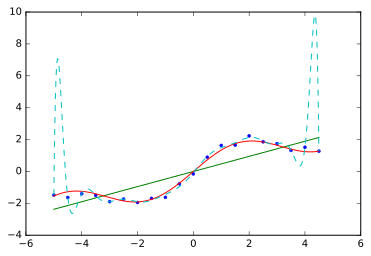

In [31]:
def f(x):
    return np.sin(x) + x/2

x = np.arange(-5, 5, 0.5)
error = np.random.randn(len(x))*0.2
y = f(x) + error

plt.plot(x, y, '.')

# underfitting
model_linear = sm.OLS(y, x).fit()
plt.plot(x, model_linear.fittedvalues)

# overfitting
polynomial_parameters = np.polyfit(x, y, deg=16)
polynomial_model = np.poly1d(polynomial_parameters)
x_poly = np.linspace(start=np.min(x), stop=np.max(x), num=500)


plt.plot(x_poly, f(x_poly), '-', x_poly, polynomial_model(x_poly), '--')

### Non-parametric Methods

* These methods do not make explicit assumptions about the functional form of $f$.
* More observations are required to estimate $f$.

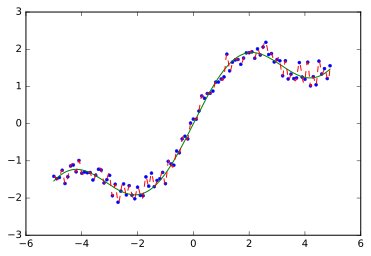

In [7]:
from scipy.interpolate import InterpolatedUnivariateSpline

x = np.arange(-5, 5, 0.1)
error = np.random.randn(len(x))*0.2
y = f(x) + error

plt.plot(x, y, '.')

spline = InterpolatedUnivariateSpline(x, y)

x_poly = np.linspace(start=np.min(x), stop=np.max(x), num=500)

plt.plot(x_poly, f(x_poly), '-', x_poly, spline(x_poly), '--')

## Assessing Model Accuracy

*"There is no free lunch in statistics: no one method dominates all others over a possible data set"*

We need to be able to select the best approach for a given data set.

#### Measuring the Quality of Fit

The *mean square error* (MSE) is a common indicator to measure the performance of a statistical learning method :

$$
MSE = \frac{1}{m} \sum_{i=1}^n (y_i -\hat{f}(x_i))^2
$$

We should not try to measure this indicator on the training data (known as the *training MSE*). Instead, we should compute this value for a given **test data** (kown as the **test MSE**).

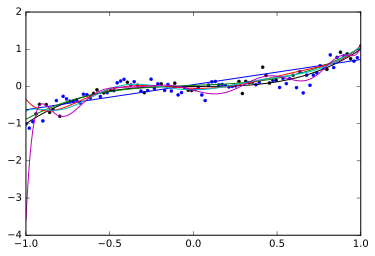

In [34]:
def f(x):
    return x**3

x = np.linspace(-1, 1, 100)
error = np.random.randn(len(x))*0.15
y = f(x) + error

train = np.random.choice(len(x), len(x)//3, replace=False)
test = np.setdiff1d(np.arange(len(x)), train)

plt.plot(x[train], y[train], linestyle='', marker='.', c='black')
plt.plot(x[test], y[test], linestyle='', marker='.', c='blue')

# Models with different values of degrees (of the fitting polynomial)
degrees = [1, 3, 6, 9, 12]
polynomial_models = [np.poly1d(np.polyfit(x[train], y[train], degree)) for degree in degrees]

x_poly = np.linspace(start=np.min(x), stop=np.max(x), num=1000)

plt.plot(x_poly, f(x_poly), '-', color='black')
for model in polynomial_models:
    plt.plot(x_poly, model(x_poly), '-')

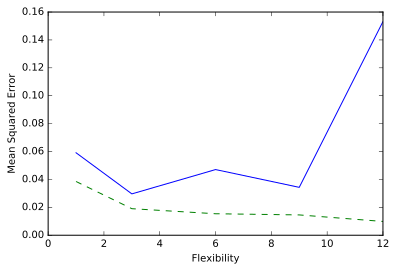

In [35]:
from sklearn.metrics import mean_squared_error
from scipy.interpolate import UnivariateSpline

MSE_test = [mean_squared_error(y[test], model(x[test])) for model in polynomial_models]
MSE_train = [mean_squared_error(y[train], model(x[train])) for model in polynomial_models]

plt.plot(degrees, MSE_test, '-b')
plt.plot(degrees, MSE_train, '--g')
plt.xlabel('Flexibility')
plt.ylabel('Mean Squared Error')

#### The Bias-Variance Trade-Off

Let $(x_0, y_0)$ denote a previously unseen test observation not used to train the statistical learning method.

$$
\begin{align*}
E[(y_0 - \hat{f}(x_0))^2] &= E[\hat{f}(x_0) - E\hat{f}(x_0)]^2 + [E\hat{f}(x_0) - f(x_0)]^2 + Var(\epsilon)\\
&= Var(\hat{f}(x_0)) + [Bias(\hat{f}(x_0))]^2 + Var(\epsilon)\\
&= \text{Variance} + \text{Bias}^2 + \text{Irreductible Error}
\end{align*}
$$

A statistical learning method is evaluated with respect to :

* **Variance** : refers to the amount by which $\hat{f}$ would change if estimated using a different training set
* **Bias** : the error introduced by approximating a real-live problem by a much simpler model

## (Simple) Linear Regression

We assume that there is **approximately** a linear relationship between X and Y :

$$
Y \approx \beta_0 + \beta_1 X,
$$

where, "$\approx$" is read as "*is approximately modeled as*", and $\beta_0$ and $\beta_1$ are two unknown constants known as the **model parameters**.

For example when considering the *advertising* dataset,

$$
\texttt{sales} \approx \beta_0 + \beta_1 \times \texttt{TV}
$$

A training dataset is used to produced estimates $\hat{\beta_0}$ and $\hat{\beta_1}$ (their values depend on the training data). The predition of $Y$ wih respect of $X = x$ is computed as follows,

$$
\hat{y} = \hat{\beta_0} + \hat{\beta_1}x
$$

#### Estimating the coefficients

We consider $n$ observation pairs (*i.e.*, measurements of $X$ and $Y$) :
    
$$
(x_1,y_1), (x_2, y_2), \ldots, (x_n, y_n)    
$$

We need to obtain coefficients $\hat{\beta_0}$ and $\hat{\beta_1}$ such that the linear model **fits** the observed data (*i.e.*) :

$$
y_i \approx \hat{\beta_0} + \hat{\beta_1}x_i,\ \text{for}\ i = 1, \ldots, n.
$$

In other words, we want to obtain coefficients  $\hat{\beta_0}$ and $\hat{\beta_1}$ such that the resulting line is as close as possible to the observed data :

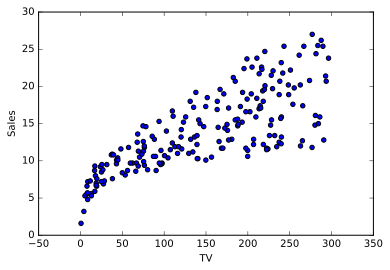

In [10]:
advertising.plot(kind='scatter', color='Blue', x='TV', y='Sales')

We seek to obtain model parameters minimizing the *least square* criterion that measure the closeness between the line and the data set:

$$
\begin{align*}
RSS &= \sum_{i = 1}^n (y_i -\hat{y_i})^2\\
    &= \sum_{i = 1}^n (y_i - \hat{\beta_0} - \hat{\beta_1}x_i)^2
\end{align*}
$$

where RSS stands for the *residual sum of squares*.

$$
\begin{align*}
0 &= \frac{\partial RSS}{\partial \hat{\beta_0}} =  \sum_{i = 1}^n (y_i
-\hat{y_i})^2(-1)\\
0 &= \frac{\partial RSS}{\partial \hat{\beta_1}} =  \sum_{i = 1}^n (y_i -\hat{y_i})^2(-x_i)\\
\end{align*}
$$

This leads to the following minimizers,

$$
\begin{align*}
\hat{\beta_1} &= \frac{\sum_{i=1}^n(x_i-\bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2},\\
\hat{\beta_0} &= \bar{y} - \hat{\beta_1}\bar{x}.
\end{align*}
$$

in this case, $\hat{\beta_0}$ and $\hat{\beta_1}$ are known as the *least squares coefficient estimates*.

beta = (7.032594, 0.047537)


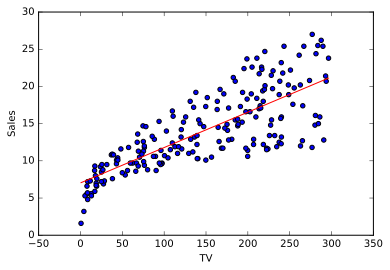

In [11]:
def least_squares_coefficients(x, y):
    y_mean = np.mean(y)
    x_mean = np.mean(x)
    beta_1 = np.sum((x-x_mean)*(y-y_mean))/np.sum((x-x_mean)**2)
    beta_0 = y_mean - beta_1*x_mean
    return beta_0, beta_1

x = advertising['TV']
y = advertising['Sales']

beta_0, beta_1 = least_squares_coefficients(x, y)

print('beta = ({:f}, {:f})'.format(beta_0, beta_1))

x_space = np.linspace(x.min(), x.max(), 100)

advertising.plot(kind='scatter', color='Blue', x='TV', y='Sales')
plt.plot(x_space, beta_0 + beta_1 * x_space, 'r')

In [12]:
from scipy.optimize import minimize

def linear_model(beta):
    return lambda x: beta[0] + beta[1] * x

def RSS(f, x, y):
    return np.sum((y-f(x))**2)

x = advertising['TV']

y = advertising['Sales']

objective_function = lambda beta: RSS(linear_model(beta), x, y)

minimize(objective_function, x0=(0, 0))

      fun: 2102.5305831319474
 hess_inv: array([[  5.31417704e-06,  -1.52178098e-07],
       [ -1.52178098e-07,   9.42807823e-08]])
      jac: array([ -9.15527344e-05,   3.05175781e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 179
      nit: 5
     njev: 42
   status: 2
  success: False
        x: array([ 7.03259588,  0.04753662])

## Polynomial Regression

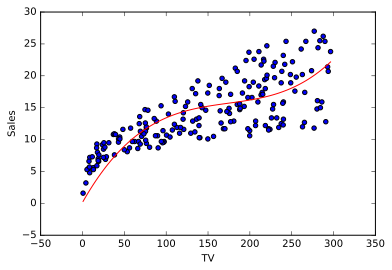

In [13]:
import scipy.optimize as opt

x = advertising['TV']
y = advertising['Sales']

def cubic_function(x, beta):
    return beta[0] + beta[1] * x + beta[2] * (x**2) + beta[3] * (x**3)

def RSS(beta):
    y_hat = cubic_function(x, beta)
    return np.sum((y-y_hat)**2)

# Use the Nelder–Mead method to solve thi nonlinear optimization problem
result = opt.minimize(fun=RSS, x0=np.zeros(4), method='Nelder-Mead')
beta = result.x

x_space = np.linspace(x.min(), x.max(), 100)

advertising.plot(kind='scatter', color='Blue', x='TV', y='Sales')
plt.plot(x_space, cubic_function(x_space, beta), 'r')

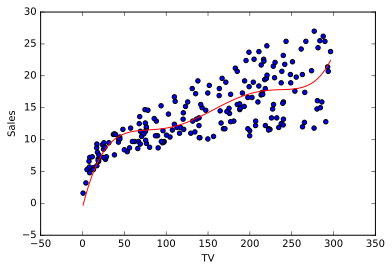

In [14]:
import scipy.optimize as opt
import numpy.polynomial.polynomial as poly

x = advertising['TV']
y = advertising['Sales']

polynomial_degree = 5

def RSS(beta):
    y_hat = poly.polyval(x, beta)
    return np.sum((y-y_hat)**2)

# Use the Nelder–Mead method to solve thi nonlinear optimization problem
result = opt.minimize(fun=RSS, x0=np.zeros(polynomial_degree + 1), method='Nelder-Mead')
beta = result.x

x_space = np.linspace(x.min(), x.max(), 100)

advertising.plot(kind='scatter', color='Blue', x='TV', y='Sales')
plt.plot(x_space, poly.polyval(x_space, beta), 'r')